Part 1

In [1]:
#num 2 
import sklearn

In [2]:
#num 3

import pandas as pd
import matplotlib.pyplot as plt
import geopy

import numpy as np

import seaborn as sns; sns.set_theme()



In [3]:
#num 4
def read_data_from_csv(file_name):
    return pd.read_csv(file_name);

df = read_data_from_csv("Mobileye_risk_TelAviv_New.csv")
df.describe()



,start_lat,start_long,end_lat,end_long,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio
count,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,32.065733,34.775065,32.065730,34.775070,557.363048,34.631136,0.004319,0.000930,0.008162,0.050953,0.026391,66.247788,276.613857,0.000002,0.015083
std,0.019065,0.010403,0.019061,0.010399,1303.459900,13.204298,0.015200,0.004901,0.017387,0.074877,0.043735,138.458602,614.604640,0.000135,0.037954
min,32.029168,34.742794,32.029091,34.742794,50.000000,9.923498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.050809,34.769196,32.050817,34.769217,93.000000,25.997728,0.000000,0.000000,0.000000,0.001731,0.000000,5.000000,38.000000,0.000000,0.000000
50%,32.064847,34.776714,32.064841,34.776717,188.000000,31.902938,0.000000,0.000000,0.000000,0.020090,0.010441,22.000000,87.000000,0.000000,0.001331
75%,32.078517,34.783262,32.078487,34.783254,481.000000,39.849982,0.000000,0.000000,0.009326,0.067423,0.033782,68.000000,265.000000,0.000000,0.011058
max,32.129996,34.791792,32.129996,34.791854,25047.000000,90.656510,0.476190,0.157895,0.235294,0.780000,0.716418,2715.000000,7130.000000,0.012346,0.636364


In [4]:
rows1,cols1 = df.shape

print(list(df.columns))


['start_lat', 'start_long', 'end_lat', 'end_long', 'detection_drives_count', 'avg_speed', 'near_miss_pedestrian_ratio', 'near_miss_bicycle_ratio', 'near_miss_vehicle_ratio', 'avg_pedestrian_on_road_volume', 'avg_bicycle_on_road_volume', 'braking_count', 'cornering_count', 'harsh_braking_ratio', 'harsh_cornering_ratio']


In [5]:
df.shape

(9266, 15)

In [6]:
df.head()


,start_lat,start_long,end_lat,end_long,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio
0,32.054769,34.772099,32.054769,34.772205,298,30.062881,0.000000,0.0,0.0,0.033557,0.033557,21,183,0.0,0.004966
1,32.089430,34.774698,32.089478,34.774449,126,26.210692,0.000000,0.0,0.0,0.071429,0.015873,0,0,0.0,0.000000
2,32.074450,34.786151,32.074516,34.786218,581,32.475986,0.001721,0.0,0.0,0.010327,0.000000,60,389,0.0,0.002571
3,32.038728,34.777766,32.038679,34.777856,294,34.194698,0.003401,0.0,0.0,0.013605,0.003401,29,201,0.0,0.003253
4,32.052037,34.763697,32.052226,34.762973,75,30.859624,0.000000,0.0,0.0,0.026667,0.000000,11,48,0.0,0.020833


Part 2

In [7]:
from geopy.distance import geodesic
def distance(row):
    address1 = (row['start_lat'], row['start_long'])
    address2 = (row['end_lat'], row['end_long'])
    return (geodesic(address1, address2).m) #in meters


In [8]:
df['section_length'] = df.apply(lambda x: distance(x), axis=1)

In [9]:
df.section_length.describe()

count    9266.000000
mean       42.657029
std        44.375733
min         0.671996
25%        11.204812
50%        26.910230
75%        62.054658
max       449.794289
Name: section_length, dtype: float64

In [10]:
def time(row):
    avg_time_hour = ((row['section_length'])/(row['avg_speed'])*1000)
    return (avg_time_hour)

In [11]:
df['avg_time'] = df.apply(lambda x: time(x), axis=1)

In [12]:
df.avg_time.describe()

count     9266.000000
mean      1448.854185
std       1687.832432
min         24.307915
25%        322.428115
50%        736.008088
75%       2093.566885
max      17109.670249
Name: avg_time, dtype: float64

In [13]:
df['avg_time_sec'] = df.apply(lambda x: (time(x)*3600), axis=1)


In [14]:
df1 = df.drop(['start_lat', 'start_long', 'end_lat', 'end_long'], axis =1)

In [15]:
df2 = df1.drop( ['detection_drives_count', 'avg_speed', 'avg_pedestrian_on_road_volume', 'avg_bicycle_on_road_volume', 'braking_count', 'cornering_count','section_length', 'avg_time']
, axis =1)

In [16]:
print(list(df2))

['near_miss_pedestrian_ratio', 'near_miss_bicycle_ratio', 'near_miss_vehicle_ratio', 'harsh_braking_ratio', 'harsh_cornering_ratio', 'avg_time_sec']


In [17]:
df1 = df.drop(['start_lat', 'start_long', 'end_lat', 'end_long','avg_time_sec'], axis =1)

In [ ]:
kmeans.fit(df1)

In [18]:
df1.describe()

,detection_drives_count,avg_speed,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,harsh_braking_ratio,harsh_cornering_ratio,section_length,avg_time
count,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000,9266.000000
mean,557.363048,34.631136,0.004319,0.000930,0.008162,0.050953,0.026391,66.247788,276.613857,0.000002,0.015083,42.657029,1448.854185
std,1303.459900,13.204298,0.015200,0.004901,0.017387,0.074877,0.043735,138.458602,614.604640,0.000135,0.037954,44.375733,1687.832432
min,50.000000,9.923498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.671996,24.307915
25%,93.000000,25.997728,0.000000,0.000000,0.000000,0.001731,0.000000,5.000000,38.000000,0.000000,0.000000,11.204812,322.428115
50%,188.000000,31.902938,0.000000,0.000000,0.000000,0.020090,0.010441,22.000000,87.000000,0.000000,0.001331,26.910230,736.008088
75%,481.000000,39.849982,0.000000,0.000000,0.009326,0.067423,0.033782,68.000000,265.000000,0.000000,0.011058,62.054658,2093.566885
max,25047.000000,90.656510,0.476190,0.157895,0.235294,0.780000,0.716418,2715.000000,7130.000000,0.012346,0.636364,449.794289,17109.670249


In [19]:
#num 10
from sklearn.preprocessing import MinMaxScaler

column_to_normalize = ['detection_drives_count', 'avg_speed', 'avg_pedestrian_on_road_volume', 'avg_bicycle_on_road_volume', 'braking_count', 'cornering_count','section_length', 'avg_time']

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(df1[column_to_normalize])

X_normalize1 = pd.DataFrame(x_scaled, columns=column_to_normalize, index=df1.index)


X_normalize = pd.concat([X_normalize1, df2],  axis=1)
pd.DataFrame(X_normalize)


,detection_drives_count,avg_speed,avg_pedestrian_on_road_volume,avg_bicycle_on_road_volume,braking_count,cornering_count,section_length,avg_time,near_miss_pedestrian_ratio,near_miss_bicycle_ratio,near_miss_vehicle_ratio,harsh_braking_ratio,harsh_cornering_ratio,avg_time_sec
0,0.009921,0.249457,0.043022,0.046840,0.007735,0.025666,0.020792,0.018066,0.000000,0.0,0.00000,0.0,0.004966,1.198725e+06
1,0.003040,0.201741,0.091575,0.022156,0.000000,0.000000,0.052166,0.052396,0.000000,0.0,0.00000,0.0,0.000000,3.310239e+06
2,0.021243,0.279347,0.013240,0.000000,0.022099,0.054558,0.020043,0.016012,0.001721,0.0,0.00000,0.0,0.002571,1.072334e+06
3,0.009761,0.300635,0.017443,0.004748,0.010681,0.028191,0.020967,0.015846,0.003401,0.0,0.00000,0.0,0.003253,1.062157e+06
4,0.001000,0.259325,0.034188,0.000000,0.004052,0.006732,0.157735,0.134214,0.000000,0.0,0.00000,0.0,0.020833,8.342646e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9261,0.002240,0.230451,0.278181,0.276533,0.000000,0.000000,0.137091,0.126275,0.000000,0.0,0.00000,0.0,0.000000,7.854350e+06
9262,0.000440,0.090072,0.210172,0.114413,0.000000,0.000000,0.117271,0.180140,0.000000,0.0,0.00000,0.0,0.000000,1.116746e+07
9263,0.000560,0.240742,0.060096,0.087240,0.000737,0.003647,0.014563,0.012956,0.000000,0.0,0.00000,0.0,0.023077,8.844014e+05
9264,0.252190,0.763426,0.000000,0.000220,0.011418,0.031417,0.111715,0.040166,0.000000,0.0,0.00063,0.0,0.009143,2.558020e+06


Part 3

In [20]:
#num 11
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#num 11
def create_kmeans_classifier(K):
    if ((type(K) == int or float) and (float(K) == int(K)) and (int(K) > 0)):
        return KMEANS(int(K))
    else:
         print("Invalid input!")

In [22]:
#num 12 +13

k = range(1, 15)
error = []
n_error = []

def KMEANS(K):
    kmeans = KMeans(n_clusters= K)
    kmeans.fit(df1) 
    return kmeans.inertia_    

for i in k:
    error.append(create_kmeans_classifier(i))

In [23]:
#num 12 +13

def KMEANS(K):
    kmeans = KMeans(n_clusters= K)
    kmeans.fit(X_normalize) 
    return kmeans.inertia_    

for i in k:
    n_error.append(create_kmeans_classifier(i))

In [24]:
print(error, "\n"  , n_error)

[45832465628.94393, 28614368715.73386, 16449864055.777414, 11725752500.322218, 8797677562.842297, 6946205413.572569, 6014866800.877944, 5264361022.917582, 4668998940.370781, 4204484890.3441033, 3770365378.4084764, 3497266514.5722103, 3138810187.173631, 2905609494.4661274] 
 [3.4206534745615475e+17, 1.2019735340350934e+17, 5.857986210543081e+16, 3.3965860504178788e+16, 2.3990222337210572e+16, 1.7160664411725056e+16, 1.263311510621949e+16, 9830757184430270.0, 7712956688697394.0, 6274464972938337.0, 5103912689759345.0, 4239528597295274.5, 3597494404994078.5, 3175887271221265.5]


In [25]:
# num 14
Silhouette = []
n_Silhouette = []

def KMEANS(K):
    kmeans = KMeans(n_clusters= K)
    kmeans.fit(df1) 
    return kmeans.cluster_centers_   

for i in k:
    Silhouette.append(create_kmeans_classifier(i))

In [26]:
#num 14

def KMEANS(K):
    kmeans = KMeans(n_clusters= K)
    kmeans.fit(X_normalize) 
    return kmeans.cluster_centers_  

for i in k:
    n_Silhouette.append(create_kmeans_classifier(i))

In [27]:
#num 15

print( "", len(Silhouette), "\n"  , len(n_Silhouette), "\n"  , len(error), "\n"  , len(n_error))

 14 
 14 
 14 
 14


Part 4

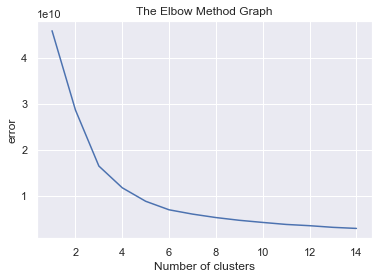

In [66]:
#num 16
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.plot(k, error)


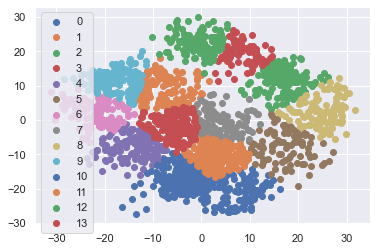

In [97]:
#num 17
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
#Load Data
data = df1
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 14)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

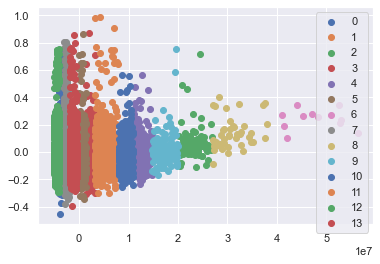

In [98]:
#num 18
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
#Load Data
data = X_normalize
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 14)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()